### Market Basket Abakysis is one of the key Techniques used by large retailers to uncover associations between items

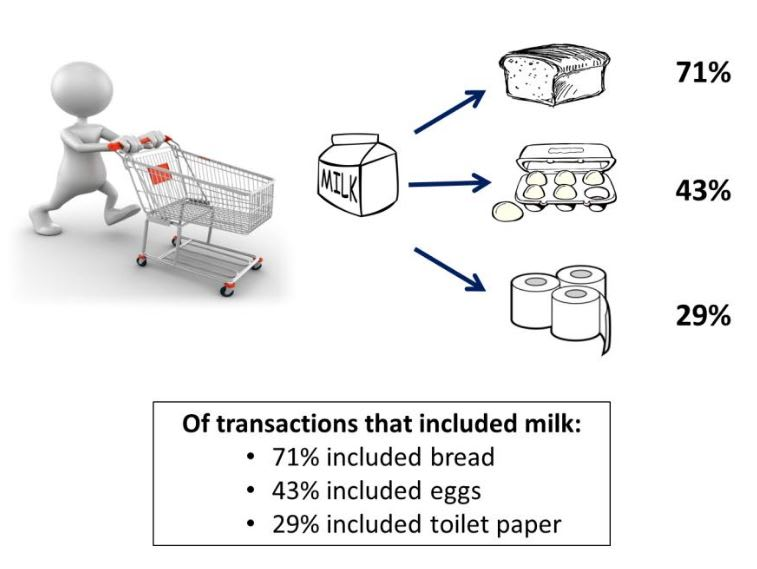

In [1]:
pip install openpyxl

     |████████████████████████████████| 242 kB 793 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## For Visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
### %matplotlib inline will make your plot outputs appear and be stored within the notebook.

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Read File from UCI 
### pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat', sep="\t", names = ['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction/side','Scaled/sound'])

In [4]:
%%time
df= pd.read_excel('../input/online-retail-for-market-basket-analysis/Online Retail.xlsx')
df

CPU times: user 1min 31s, sys: 492 ms, total: 1min 32s
Wall time: 1min 33s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


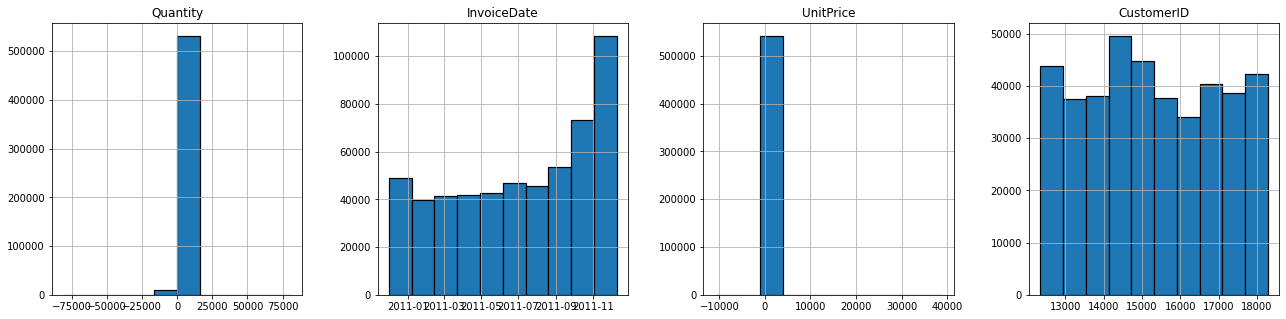

In [6]:
df.hist(figsize=(22,5), edgecolor='Black', linewidth=1.2, layout=(1,4));

In [7]:
df.describe(include= 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


Quantit

# To Do in EDA:
1. Create a word cloud for description.
2. Check for average Quantity.
3. Unique customer id and invoice and try to find order placed per customer.
4. No of Country with order volume.
5. Seperate Invoice Date with Invoice Time

## Data Cleaning

In [8]:
### Check for Duplicates
# Use the DataFrame.duplicated() method to return a series of boolean values thus we add .sum() to get no of duplicate value
df.duplicated().sum()

5268

In [9]:
### Drop Duplicates
df.drop_duplicates(inplace=True)

In [10]:
df[df['InvoiceNo'].str.contains('C', na=False, regex=True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
#Data Cleaning
df['Description'] = df['Description'].str.strip()                  #removes spaces from beginning and end
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)              #removes duplicate invoice
df['InvoiceNo'] = df['InvoiceNo'].astype('str')                    #converting invoice number to be string
df = df[~df['InvoiceNo'].str.contains('C')]                        #remove the credit transactions 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


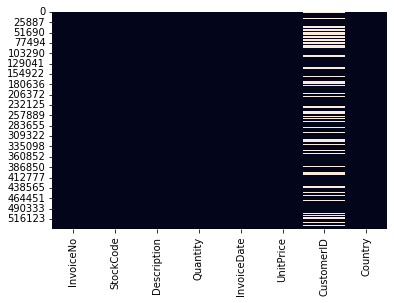

In [12]:
sns.heatmap(df.isnull(), cbar=False);

In [13]:
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.275887
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.532907
Country         0.000000
dtype: float64

In [14]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [15]:
### Storing df with not na CustomerId
dfc= df[df['CustomerID'].notna()]

### How come Unit price is 0, Lets investigate

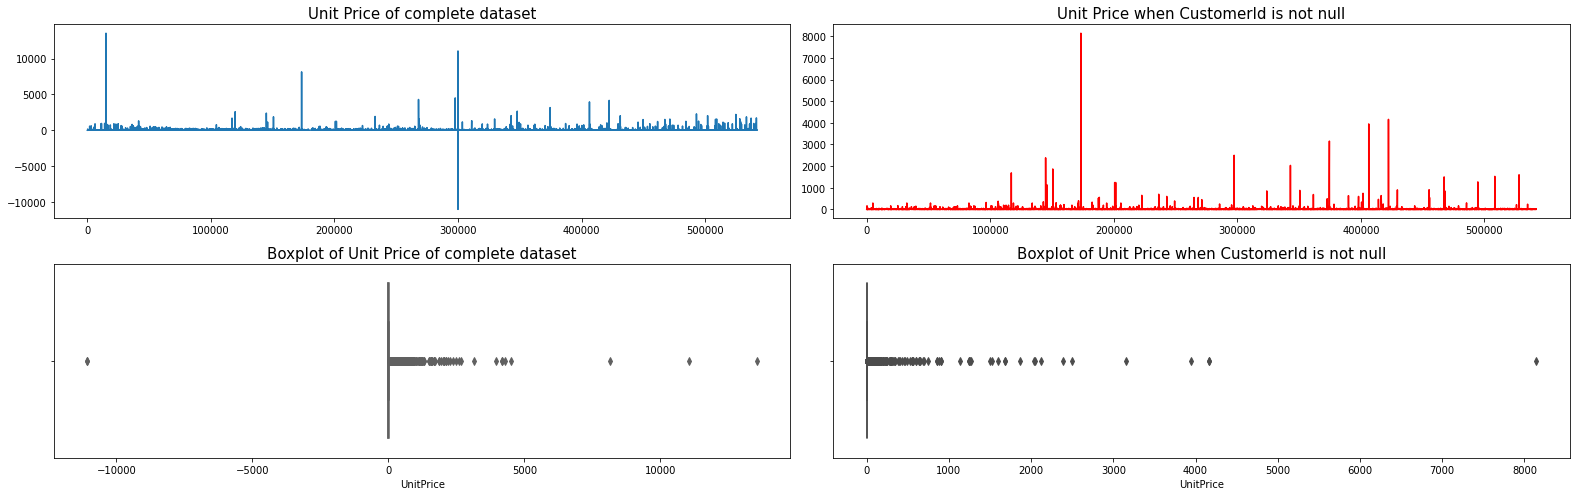

In [16]:
plt.figure(figsize=(22,7))
plt.subplot(2,2,1)
df.UnitPrice.plot()
plt.title('Unit Price of complete dataset', fontsize=15)
plt.subplot(2,2,2)
dfc.UnitPrice.plot(color='red')
plt.title('Unit Price when CustomerId is not null', fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(df.UnitPrice, palette='Blues')
plt.title('Boxplot of Unit Price of complete dataset', fontsize=15)
plt.subplot(2,2,4)
sns.boxplot(dfc.UnitPrice, color='red')
plt.title('Boxplot of Unit Price when CustomerId is not null', fontsize=15)

plt.tight_layout()

Intresting unit price seem to -ve too. lets check all posibilities

In [17]:
# Checking for rows with UnitPrice == 0
df[df['UnitPrice']== 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


Places where UnitPrice is 0.0 `CustomerID` is NaN and `Description` is also NaN

In [18]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [19]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [20]:
### Max description is nan, so lets create a temp data frame to check for notna entries in description
temp= df[df['UnitPrice']==0]
temp[temp['Description'].notna()].head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom
14335,537534,85064,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
14336,537534,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
14337,537534,84692,BOX OF 24 COCKTAIL PARASOLS,2,2010-12-07 11:48:00,0.0,NaN,United Kingdom


In [21]:
### Lets check 'GLASS JAR KINGS CHOICE' price to check my hypothesis that up= 0 means return/cancel
df[df['Description']=='GLASS JAR KINGS CHOICE'].describe()

,Quantity,UnitPrice,CustomerID
count,85.000000,85.000000,62.000000
mean,2.211765,3.485059,15472.354839
std,2.155249,1.441608,1506.534087
min,1.000000,0.000000,12748.000000
25%,1.000000,2.950000,14502.000000
50%,1.000000,2.950000,15369.500000
75%,2.000000,2.950000,16792.250000
max,12.000000,5.910000,18183.000000


In [22]:
df[df['UnitPrice']==0].Description.unique()

array([nan, 'amazon', '?', 'ROUND CAKE TIN VINTAGE GREEN', 'check',
       'damages', 'CREAM SWEETHEART LETTER RACK',
       'ZINC WILLIE WINKIE  CANDLE STICK', 'BOX OF 24 COCKTAIL PARASOLS',
       'DOORMAT ENGLISH ROSE', 'DOORMAT 3 SMILEY CATS',
       'GREEN REGENCY TEACUP AND SAUCER', 'FRENCH BLUE METAL DOOR SIGN 7',
       'FRENCH BLUE METAL DOOR SIGN 5', 'FRENCH BLUE METAL DOOR SIGN 6',
       'FRENCH BLUE METAL DOOR SIGN 4', 'FRENCH BLUE METAL DOOR SIGN No',
       'FRENCH BLUE METAL DOOR SIGN 8', 'FRENCH BLUE METAL DOOR SIGN 1',
       'RED KITCHEN SCALES', 'IVORY KITCHEN SCALES',
       'SET OF 6 SOLDIER SKITTLES', 'CHILDS GARDEN TROWEL BLUE',
       'CHILDRENS GARDEN GLOVES BLUE', 'PICNIC BASKET WICKER SMALL',
       'PICNIC BASKET WICKER LARGE', 'EMPIRE UNION JACK TV DINNER TRAY',
       'TV DINNER TRAY VINTAGE PAISLEY', 'SPACEBOY TV DINNER TRAY',
       'TV DINNER TRAY DOLLY GIRL', 'CHILDS GARDEN SPADE BLUE',
       'CHILDS GARDEN RAKE BLUE', 'WATERING CAN PINK BUNNY',
    

In [23]:
### Why Quantity is in -ve
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


There are **1336 rows having quantity in -ve**. Lets check their description/ reason for being in -ve

In [24]:
df[df['Quantity']<0].Description.unique()

array([nan, '?', 'check', 'damages', 'faulty', 'Dotcom sales',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'counted',
       'Given away', 'Dotcom', 'label mix up', 'samples/damages',
       'thrown away', 'incorrectly made-thrown away.', 'showroom', 'MIA',
       'Dotcom set', 'wrongly sold as sets', 'Amazon sold sets',
       'dotcom sold sets', 'wrongly sold sets', '? sold as sets?',
       '?sold as sets?', 'Thrown away.', 'damages/display',
       'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)',
       'wrong barcode', 'barcode problem', '?lost',
       "thrown away-can't sell.", "thrown away-can't sell", 'damages?',
       're dotcom quick fix.', "Dotcom sold in 6's", 'sold in set?',
       'cracked', 'sold as 22467', 'Damaged',
       'mystery! Only ever imported 1800',
       'MERCHANT CHANDLER CREDIT ERROR, STO', 'POSSIBLE DAMAGES OR LOST?',
       'damaged', 'DAMAGED', 'Display', 'Missing', 'wrong code?',
       'wrong code', 'adjust', 'crush

Quantity is -ve only when I tem is **sent to wrong adrees**, **is damaged** or **is returned or cancelled**

In [25]:
### Exploring gifts in StockCode
df[df['StockCode'].str.contains('gift', na=False, regex=True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,NaN,United Kingdom
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-12-23 13:26:00,42.55,NaN,United Kingdom
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-01-05 14:44:00,25.53,NaN,United Kingdom
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-05 14:44:00,17.02,NaN,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-13 09:30:00,16.67,NaN,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-02-15 17:51:00,16.67,NaN,United Kingdom
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-17 15:51:00,25.00,NaN,United Kingdom
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-18 16:12:00,25.00,NaN,United Kingdom
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-03-07 17:14:00,8.33,NaN,United Kingdom
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-04-04 15:54:00,33.33,NaN,United Kingdom


In [26]:
### Randomly checked an InvoiceNo and all 283 entries have missing CustomerID
df[df['InvoiceNo']=='539492']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
37968,539492,10135,COLOURING PENCILS BROWN TUBE,1,2010-12-20 10:14:00,2.51,NaN,United Kingdom
37969,539492,15034,PAPER POCKET TRAVELING FAN,2,2010-12-20 10:14:00,0.85,NaN,United Kingdom
37970,539492,15036,ASSORTED COLOURS SILK FAN,1,2010-12-20 10:14:00,1.28,NaN,United Kingdom
37971,539492,15060B,FAIRY CAKE DESIGN UMBRELLA,1,2010-12-20 10:14:00,8.47,NaN,United Kingdom
37972,539492,16048,TEATIME ROUND PENCIL SHARPENER,2,2010-12-20 10:14:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
38246,539492,90197B,BLACK GLASS BRACELET W HEART CHARMS,1,2010-12-20 10:14:00,5.09,NaN,United Kingdom
38247,539492,90209C,PINK ENAMEL+GLASS HAIR COMB,1,2010-12-20 10:14:00,2.11,NaN,United Kingdom
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,NaN,United Kingdom
38249,539492,DOT,DOTCOM POSTAGE,1,2010-12-20 10:14:00,396.81,NaN,United Kingdom


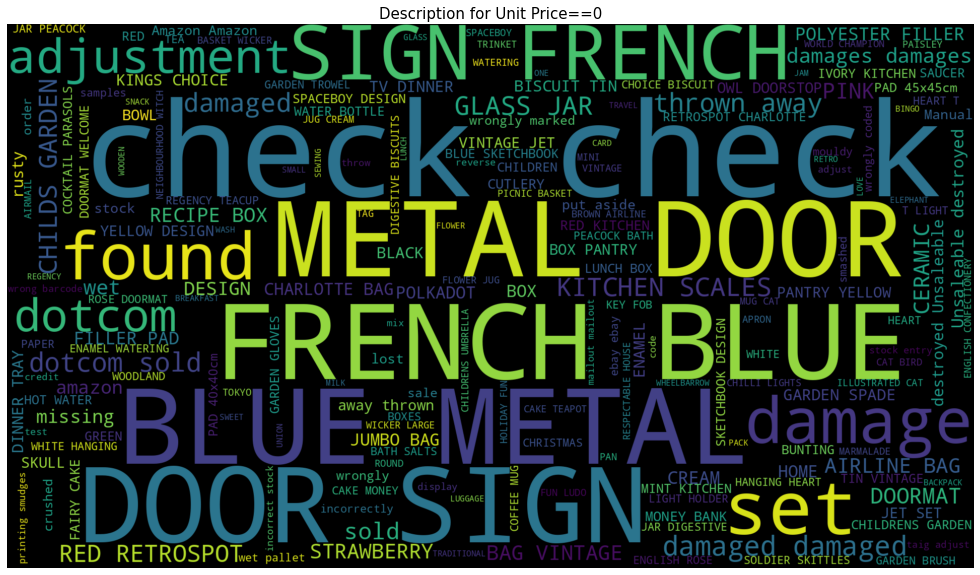

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wc= WordCloud(background_color='Black',stopwords=stopwords, height=1080, width =1920)

body =temp['Description'].dropna().to_string(index=False)
### Generate word cloud
wc.generate(body)
## Visualize
plt.figure(figsize=(22,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Description for Unit Price==0", fontsize=15)
wc.to_file('body.png');

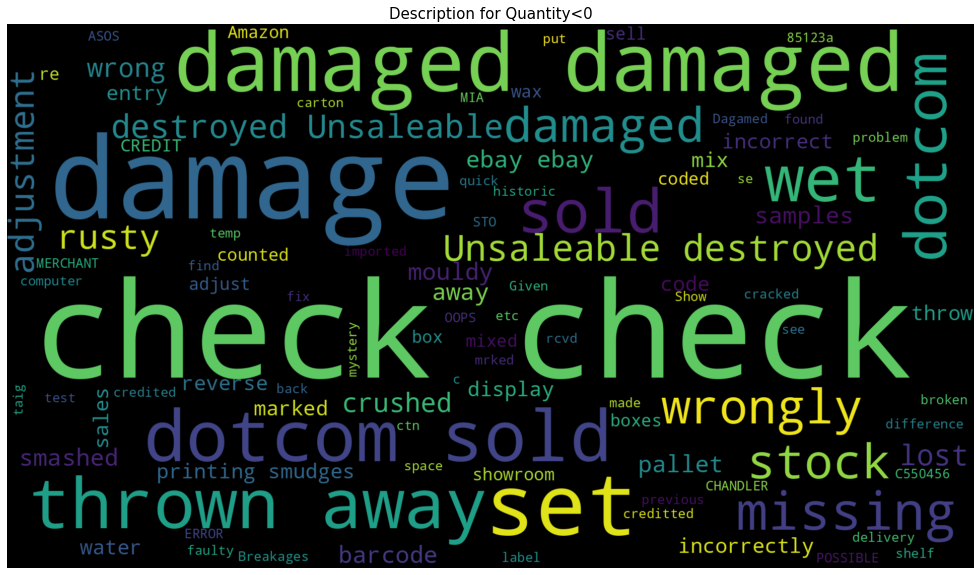

In [28]:
body1 =df[df['Quantity']<0].Description.dropna().to_string(index=False)
### Generate word cloud
wc.generate(body1)
## Visualize
plt.figure(figsize=(22,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Description for Quantity<0", fontsize=15)
wc.to_file('body1.png');

## Date time Formating

In [29]:
import datetime as datetime
from datetime import datetime
#datetime.strptime('2013-01-01 09:10:12', '%Y-%m-%d %H:%M:%S')

In [30]:
df['invoice_date'] = df['InvoiceDate'].dt.date
df['invoice_time_hour'] = df['InvoiceDate'].dt.hour
df['invoice_time_min'] = df['InvoiceDate'].dt.minute

### Converting invoice date to data time
df['invoice_date']= pd.to_datetime(df['invoice_date'], infer_datetime_format= True)

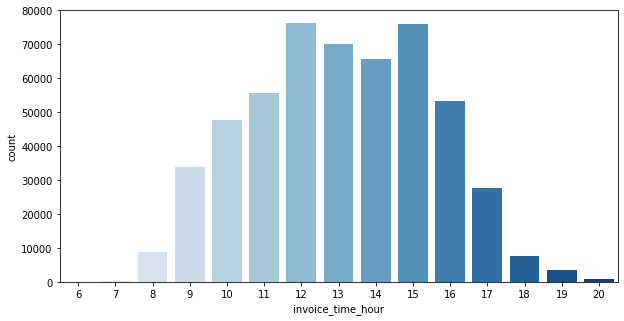

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'invoice_time_hour', data=df, palette= 'Blues');

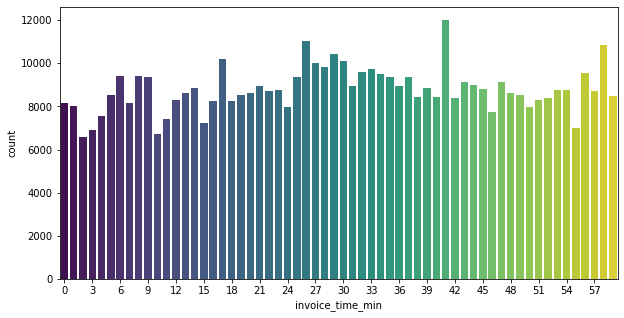

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'invoice_time_min', data=df,  palette= 'viridis')
plt.xticks(np.arange(0, 59+1, 3.0));  ### Setting interval of min to 3

In [33]:
### How many items each customer buy?
# dfc.InvoiceNo.value_counts()
print("On Average no of orders placed ny a customer")
print(dfc.InvoiceNo.nunique()/dfc.CustomerID.nunique())

On Average no of orders placed ny a customer
4.271952062687255


In [34]:
dfc.groupby('CustomerID').sum()
# .InvoiceNo.plot()

,Quantity,UnitPrice
CustomerID,,
12346.0,74215,1.04
12347.0,2458,481.21
12348.0,2341,178.71
12349.0,631,605.10
12350.0,197,65.30
...,...,...
18280.0,45,47.65
18281.0,54,39.36
18282.0,103,62.39


In [35]:
dfc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [36]:
### Top 10 Products (Best seller)
product_group =dfc.groupby('StockCode').mean()
product_group

,Quantity,UnitPrice,CustomerID
StockCode,,,
10002,16.795918,0.850000,14772.285714
10080,13.857143,0.411905,15857.809524
10120,6.620690,0.210000,16145.586207
10125,19.444444,0.781746,15215.396825
10133,19.450820,0.529262,15502.811475
...,...,...,...
C2,1.007519,50.135338,14581.796992
DOT,1.000000,744.147500,14096.000000
M,24.347368,174.650211,15385.207018


In [37]:
product_group.sort_values('Quantity')

,Quantity,UnitPrice,CustomerID
StockCode,,,
37461,1.000000,1.250000,14606.000000
90120D,1.000000,4.250000,15303.000000
35597B,1.000000,1.250000,15048.000000
90122B,1.000000,4.950000,17537.000000
35597A,1.000000,1.250000,15048.000000
...,...,...,...
23166,393.515152,1.220303,15390.510101
84826,415.121212,0.532121,15087.000000
84568,480.000000,0.203043,15062.130435


### Country wise analysis of data

In [38]:
df.Country.nunique()

38

In [39]:
dfc.Country.nunique()

37

In [40]:
dfc.Country.value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

### Lets pick 2nd top country i.e `Germany` to perform MBA as UK have a lot of entries and it will make our computation very slow

# Market Basket Analysis (MBA)

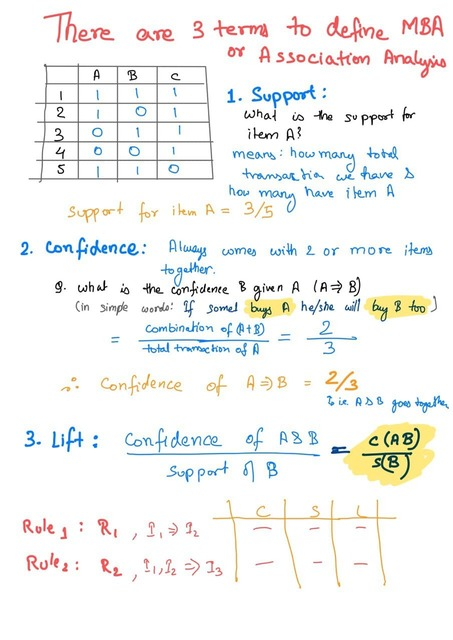

### Applications
1. Retail/supply Markets/ FMCG Companies
2. Insurance Companies
3. Medical
4. Bank/ Credic Card Companies
5. Telecom Analyse Various Services offered by Telecom Companies and what customers are purchasing

In [41]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### To view all columns from dataframe
pd.set_option('display.max_columns', None)

In [42]:
dfc[dfc['Country']=='Germany']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany


In [43]:
dfc[dfc['Country']=='Germany'].InvoiceNo.nunique()

457

In [44]:
dfc[dfc['Country']=='Germany'].Description.nunique()

1695

In [45]:
#Separating transactions for Germany
### GroupBy Invoice and Description and sum of quantity
### .unstack() :: Pivot a level of the (necessarily hierarchical) index labels.
mybasket_ger = (dfc[dfc['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

mybasket_ger

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                          0.0                         0.0   
536840                          0.0                         0.0   
536861                          0.0                         0.0   
536967                          0.0                         0.0   
536983                          0.0                         0.0   
...                             ...                         ...   
581266                          0.0                         0.0   
581494                          0.0                         0.0   
581570                          0.0                         0.0   
581574                          0.0                         0.0   
581578                          0.0                         0.0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                    0.0   
536840                                    0.0   
536861                                    0.0   
536967                                    0.0   
536983                                    0.0   
...                                       ...   
581266                                    0.0   
581494                                    0.0   
581570                                    0.0   
581574                                    0.0   
581578                                    0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536527                                   0.0                            0.0   
536840                                   0.0                            0.0   
536861                                   0.0                            0.0   
536967                                   0.0                            0.0   
536983                                   0.0                            0.0   
...                                      ...                            ...   
581266                                   0.0                            0.0   
581494                                   0.0                            0.0   
581570                                   0.0                            0.0   
581574                                   0.0                            0.0   
581578                                   0.0                            0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536527                                       0.0                          0.0   
536840                                       0.0                          0.0   
536861                                       0.0                          0.0   
536967                                       0.0                          0.0   
536983                                       0.0                          0.0   
...                                          ...                          ...   
581266                                       0.0                          0.0   
581494                                       0.0                          0.0   
581570                                       0.0                          0.0   
581574                                       0.0                          0.0   
581578                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536527                             0.0                                 0.0   
536840                             0.0                                 0.0   
536861                             0.0                                 0.0   
536967            

Now we can observe that no of columns have shot up from **8 columns to 1695 columns as it is the no of unique description** and since we group df by index and there are **457 unique index thus rows are reduced to 457**

`NOTE`
* If value=0 that mean this product wasn't present in this invoice.
* If value=n `Where n is +ve int`` it means that item was present n time in the invoice.

In [46]:
#converting all positive vaues to 1 and everything else to 0
### i.e all no less than 1 to 0
### and all no greater than equal to 1 to 1

## Why doing this because I want my data to be only 0 & 1 as this is the only value my algo is expecting as input

def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket_ger.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item
### Display sample of set
my_basket_sets.sample(3)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,50'S CHRISTMAS PAPER GIFT BAG,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 RIBBONS SHIMMERING PINKS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ABC TREASURE BOOK BOX,ACRYLIC GEOMETRIC LAMP,"ACRYLIC HANGING JEWEL,PINK",ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALPHABET HEARTS STICKER SHEET,ALPHABET STENCIL CRAFT,ANGEL DECORATION PAINTED ZINC,ANIMAL STICKERS,ANT COPPER LIME BOUDICCA BRACELET,ANT COPPER PINK BOUDICCA BRACELET,ANT COPPER TURQ BOUDICCA BRACELET,ANTIQUE GLASS DRESSING TABLE POT,ANTIQUE GLASS PEDESTAL BOWL,ANTIQUE SILVER T-LIGHT GLASS,APOTHECARY MEASURING JAR,APPLE BATH SPONGE,APRON APPLE DELIGHT,AREA PATROLLED METAL SIGN,ASS FLORAL PRINT MULTI SCREWDRIVER,ASSORTED BOTTLE TOP MAGNETS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR LIZARD SUCTION HOOK,ASSORTED COLOUR MINI CASES,ASSORTED COLOUR T-LIGHT HOLDER,ASSORTED COLOURS SILK FAN,ASSORTED EASTER DECORATIONS BELLS,ASSORTED EASTER GIFT TAGS,"ASSORTED FLOWER COLOUR ""LEIS""",ASSORTED MONKEY SUCTION CUP HOOK,ASSORTED TUTTI FRUTTI BRACELET,ASSORTED TUTTI FRUTTI PEN,ASSTD DESIGN 3D PAPER STICKERS,ASSTD DESIGN RACING CAR PEN,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,BABUSHKA LIGHTS STRING OF 10,BABY BOOM RIBBONS,BAG 125g SWIRLY MARBLES,BAG 250g SWIRLY MARBLES,BAG 500g SWIRLY MARBLES,BAKING MOULD CHOCOLATE CUPCAKES,BAKING MOULD EASTER EGG WHITE CHOC,BAKING MOULD HEART MILK CHOCOLATE,BAKING MOULD HEART WHITE CHOCOLATE,BAKING MOULD ROSE MILK CHOCOLATE,BAKING MOULD ROSE WHITE CHOCOLATE,BAKING MOULD TOFFEE CUP CHOCOLATE,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BALLOON ART MAKE YOUR OWN FLOWERS,BALLOON PUMP WITH 10 BALLOONS,BALLOON WATER BOMB PACK OF 35,BALLOONS WRITING SET,BANQUET BIRTHDAY CARD,BASKET OF TOADSTOOLS,BATH BUILDING BLOCK WORD,BATHROOM METAL SIGN,BEACH HUT SHELF W 3 DRAWERS,BEADED CHANDELIER T-LIGHT HOLDER,BEADED CRYSTAL HEART GREEN LARGE,BELLE JARDINIERE CUSHION COVER,BEWARE OF THE CAT METAL SIGN,BICYCLE PUNCTURE REPAIR KIT,BIG DOUGHNUT FRIDGE MAGNETS,BILI NUT AND WOOD NECKLACE,BIRD DECORATION GREEN POLKADOT,BIRD DECORATION RED RETROSPOT,BIRD HOUSE HOT WATER BOTTLE,BIRDCAGE DECORATION TEALIGHT HOLDER,BIRDS MOBILE VINTAGE DESIGN,BIRTHDAY BANQUET GIFT WRAP,"BIRTHDAY CARD, RETRO SPOT",BIRTHDAY PARTY

# Training Model Apriori
### Apriori algo uses frequent item sets to generate association rules. It is based on the concept that a subset of a frequent item set must also be a frequent item set.
### Frequent itme set is an itemset whose support value is greater than a threshold value.

**What is apriori algorithm?**

Apriori Algorithm is a Machine Learning algorithm that is used to gain insight into the structured relationships between different items involved. It’s a data mining technique that is used for mining frequent itemsets and relevant association rules.

Example: Recommending products based on your purchased items. You can see this in different e-commerce websites. (Recommendation system)

Things that we need to know before implementation:

**Association rule:** It identifies frequent patterns and associations(relations) among a set of items. Ex: If you go to buy a keyboard, you might also get a mouse. So place them aside in your market to get more profit. **Association rule** can be thought as ***if-else relationship***. 
If `A` => Then `B` here A is called `antecedent` and B is called `Consequent`. Consequent comes along as an item with an antecedent group or the group of antecedents.
### 3 Types of Matrices which help to measure the Association


**Support**: Frequency of combination of (A & B) by N.Support refers to the default popularity of an item and can be calculated by finding the number of transactions containing a particular item divided by total number of transactions.

Support (Keyboard) = (Transactions containing (Keyboard)) / (Total Transactions))

**Confidence**: Confidence refers to the likelihood that an item B (mouse) is also bought if item A (keyboard) is bought. Like our keyboard and mouse example.

Confidence(Keyboard→Mouse) = (Transactions containing both (Keyboard and Mouse))/(Transactions containing Keyboard)

**Lift**: Lift(Keyboard -> Mouse) refers to the increase in the ratio of sale of Mouse when the Keyboard is sold. Lift(Keyboard -> Mouse) can be calculated by dividing Confidence(Keyboard→Mouse) divided by Support(Mouse).

Lift(Keyboard -> Mouse) = (Confidence(Keyboard→Mouse))   /  (Support (Mouse))

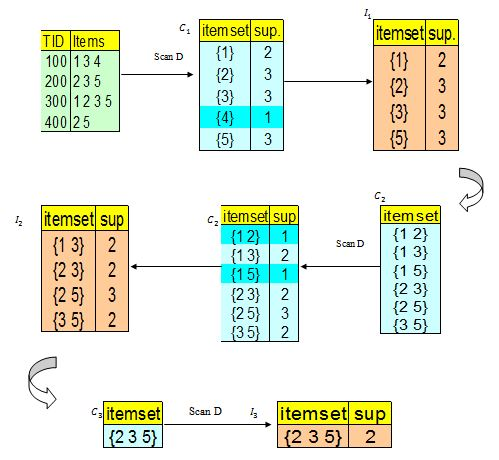


In [47]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

In [48]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

### Recap about Support, Confidence and lift
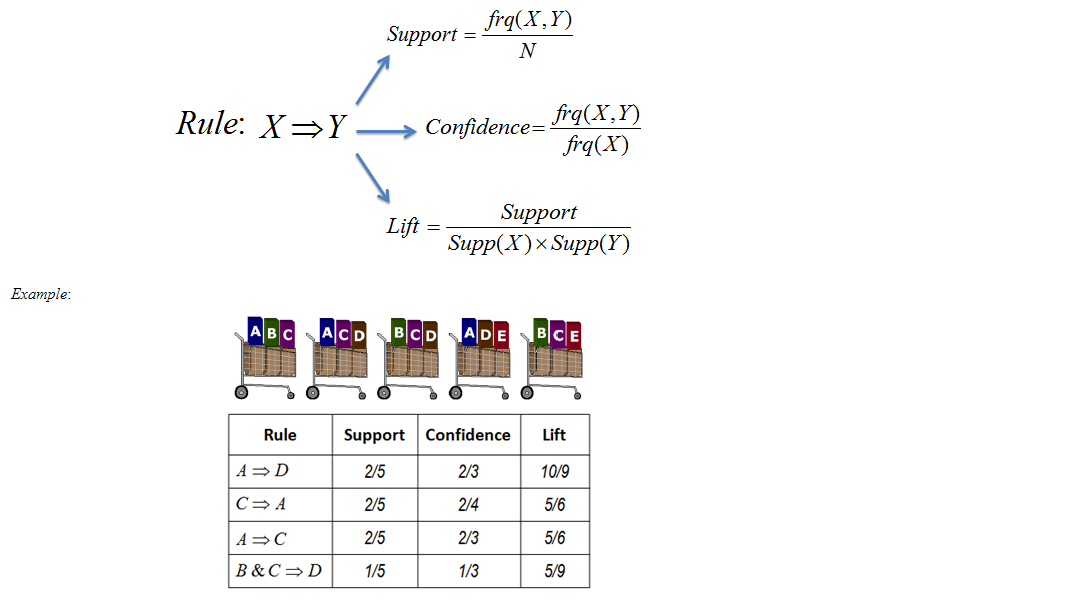

## Top 100 rules
***antecedents*** Implies => ***consequents***

In [49]:
#viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018
5,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427


## Making reecommendations

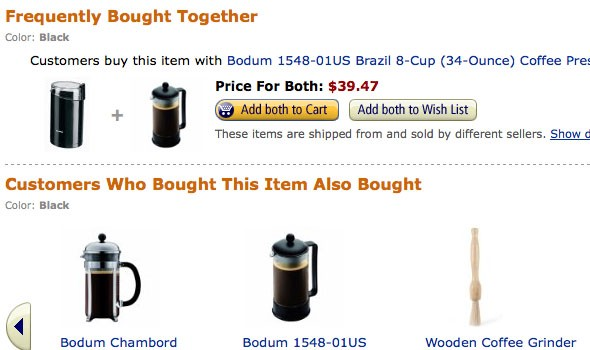

In [50]:
## For comparing with Rule 1 and 5
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

In [51]:
### Rule 1
my_basket_sets['PLASTERS IN TIN WOODLAND ANIMALS'].sum()

63

In [52]:
### Rule 5
my_basket_sets['SPACEBOY LUNCH BOX'].sum()

47

* ROUND SNACK BOXES SET OF4 WOODLAND occurs 112 times follwed by 'PLASTERS IN TIN WOODLAND ANIMALS' occuring 63 time
* ROUND SNACK BOXES SET OF4 WOODLAND occurs 112 times follwed by 'SPACEBOY LUNCH BOX' occuring 47 time

In [53]:
#Filtering rules based on condition 
    ### lift >= 3 && Confidence >=3
my_rules[ (my_rules['lift'] >= 3) &
       (my_rules['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509


In [54]:
my_rules[ (my_rules['lift'] >= 2) &
       (my_rules['confidence'] >= 0.6) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
5,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427


In [55]:
my_rules[ (my_rules['lift'] < 3) &
       (my_rules['confidence'] < 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018


# Thank You!